# Képek osztályozása (Jármű / nem jármű) konvolúciós neurális hálózattal

**Szükséges dependency-k:**

*pip vagy anaconda csomagkezelővel szükséges futtatás előtt ezeket feltelepíteni*

In [2]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

**Felhasznált objektumok:**

In [7]:
# Needed for the data classification folders to automate training and validation data reading
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from sklearn.metrics import confusion_matrix
from itertools import *
from tensorflow.keras.optimizers import Adam
from tensorflow import keras

Színes képek normalizálása 0 és 1 közé (rescale)

**ImageDataGenerator** használata mappák és képek betöltésére

*A tanító képek a training mappában találhatóak, osztályozva*

*A validációs képek a tanítás során nem frissítik a **súlymátrix** értékeit, azonban tanítás során ez ad becslést a működés pontosságára*

In [4]:
#training
train = ImageDataGenerator(rescale=1/255)
#validating
validation = ImageDataGenerator(rescale=1/255)

In [5]:
image_size = (200, 200)
image_size_rgb = (200,200,3)
learning_rate = 0.001

In [6]:
train_dataset = train.flow_from_directory('training/', target_size= image_size, batch_size=5, class_mode='categorical')

validation_dataset = validation.flow_from_directory('validating/', target_size= image_size, batch_size=2, class_mode='categorical')

Found 124 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


### Conv2D paraméterei

<code>első paraméter: neuronok száma
második paraméter: filter 
activation: aktivációs függvény
padding="same": zero padding használata
input_shape: csak az input layer-ben kell megadni</code>

In [7]:
model = Sequential([
    Conv2D(16, (3,3), activation = 'relu', padding="same", input_shape= image_size_rgb),
    MaxPool2D(2,2),
    Conv2D(32, (3,3), activation = 'relu', padding="same"),
    MaxPool2D(2,2),
    Conv2D(64, (3,3), activation = 'relu', padding="same"),
    MaxPool2D(2,2),
    Conv2D(128, (3,3), activation = 'relu', padding="same"),
    MaxPool2D(2,2),
    Conv2D(256, (3,3), activation = 'relu', padding="same"),
    MaxPool2D(2,2),
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(2,activation='softmax')    
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 128)       7

**Adam optimalizáló használata** *RMSprop is lehetne, de az Adam a jelenlegi legjobb optimizer*

In [8]:

optimizer = Adam(learning_rate = learning_rate)
model.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics =['accuracy'])

# Neurális háló tanítása

In [9]:
model_fit = model.fit(train_dataset, steps_per_epoch = None, epochs=30, validation_data=validation_dataset)

Epoch 1/30
25/25 [==============================] - 7s 267ms/step - loss: 0.6159 - accuracy: 0.7967 - val_loss: 1.1313 - val_accuracy: 0.4000
Epoch 2/30
25/25 [==============================] - 4s 144ms/step - loss: 0.3648 - accuracy: 0.8211 - val_loss: 0.5866 - val_accuracy: 0.4000
Epoch 3/30
25/25 [==============================] - 4s 143ms/step - loss: 0.2454 - accuracy: 0.8374 - val_loss: 0.8158 - val_accuracy: 0.7000
Epoch 4/30
25/25 [==============================] - 3s 128ms/step - loss: 0.2048 - accuracy: 0.8943 - val_loss: 0.4784 - val_accuracy: 0.8500
Epoch 5/30
25/25 [==============================] - 3s 134ms/step - loss: 0.1692 - accuracy: 0.9268 - val_loss: 0.1718 - val_accuracy: 1.0000
Epoch 6/30
25/25 [==============================] - 3s 125ms/step - loss: 0.1873 - accuracy: 0.9187 - val_loss: 0.3299 - val_accuracy: 0.9000
Epoch 7/30
25/25 [==============================] - 4s 144ms/step - loss: 0.1960 - accuracy: 0.9268 - val_loss: 1.0740 - val_accuracy: 0.8000
Epoch 

# Tesztképek kipróbálása

*A tesztképek a predicting mappában találhatóak*

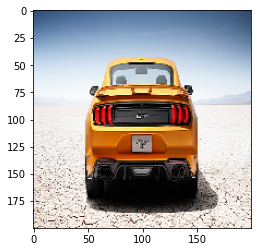

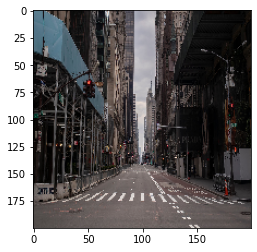

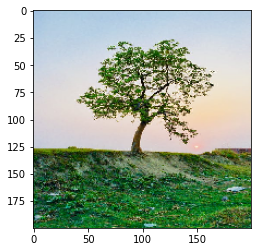

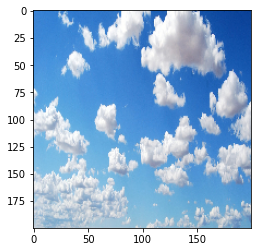

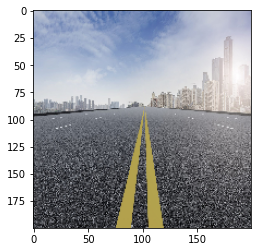

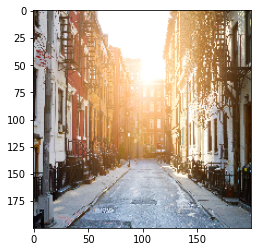

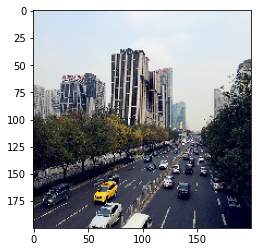

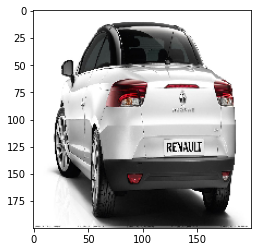

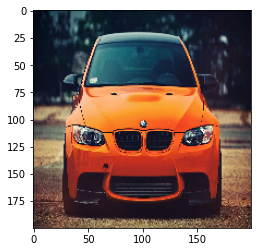

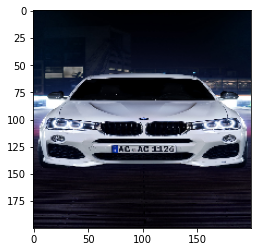

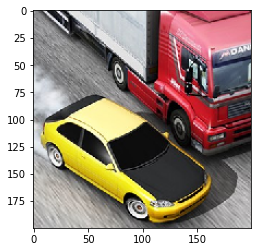

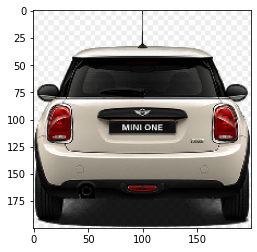

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x0000021F612F5720>

In [8]:
dir_path = 'predicting'

predictions = []

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'/'+i, target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)/255
    X = np.expand_dims(X, axis = 0)
    val = model.predict(X)
    predictions.append(val)   
    

In [11]:
predictions

[array([[0., 1.]], dtype=float32),
 array([[0.918355  , 0.08164498]], dtype=float32),
 array([[9.999924e-01, 7.643956e-06]], dtype=float32),
 array([[9.9996507e-01, 3.4906283e-05]], dtype=float32),
 array([[9.9999726e-01, 2.7551071e-06]], dtype=float32),
 array([[1.000000e+00, 5.385344e-08]], dtype=float32),
 array([[1.000000e+00, 3.183484e-11]], dtype=float32),
 array([[9.9999869e-01, 1.3167379e-06]], dtype=float32),
 array([[0., 1.]], dtype=float32),
 array([[1.2232146e-27, 1.0000000e+00]], dtype=float32),
 array([[0., 1.]], dtype=float32),
 array([[0.00136849, 0.99863154]], dtype=float32),
 array([[0., 1.]], dtype=float32)]

## Neurális háló elmentése

A tanítóképek mellett, ez a file sem jelenik meg a remote repository-ban, mivel túl nagy méretű

In [12]:
model.save("VehicleClassificatorCNN.h5")